In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
class lin_reg:
    def __init__(self, num_dim):
        self.num_dim = num_dim
        self.coeff = np.ones(num_dim)
        
    def predict(self, x):
        return np.matmul(self.coeff, x)
        
    def loss(self, x, y):
        return (1/2) * np.sum((self.predict(x) - y) ** 2)
    
    def gradient_descent(self, x, y, step_size):
        
        for j in range(100000):
            # Calculate gradient
            grad = np.zeros(self.num_dim)
            for i in range(self.num_dim):
                grad[i] = np.sum((self.predict(x) - y) * x[i, :])

            #Adjust weights accordingly
            self.coeff = self.coeff - step_size * grad
        
                   
        

In [82]:
# Load Data
# Remember to add a constant column to X
x_path = r"C:\Users\Alexander\Desktop\compstat\Homework2\data\rx.dat"
y_path = r"C:\Users\Alexander\Desktop\compstat\Homework2\data\ry.dat"
x_data = np.loadtxt(x_path)
y = np.loadtxt(y_path)
x = np.array([np.ones(len(x_data)), x_data])

In [83]:
lr = lin_reg(len(x))
lr.gradient_descent(x, y, 0.000001)

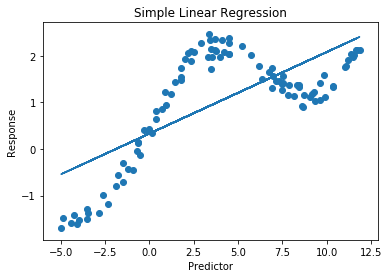

In [101]:
plt.plot(x[1, :], lr.predict(x))
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.title("Simple Linear Regression")
plt.scatter(x[1, :], y)
plt.savefig("SLR.png")

In [109]:
class weighted_lin_reg:
    def __init__(self, num_dim):
        self.num_dim = num_dim
        self.coeff = np.ones(num_dim)
        
    def predict(self, x):
        # Calculate y-hat
        return np.matmul(self.coeff, x)
    
    def loss(self, x, y, weights):
        # Calculate loss
        return (1/2) * np.sum(weights * (self.predict(x) - y) ** 2)
    
    def gradient_descent(self, x, y, weights, step_size):
        #Calculate gradient and run gradient descent
        jl = []
        for j in range(1000):
            # Calculate gradient
            grad = np.zeros(self.num_dim)
            for i in range(self.num_dim):
                grad[i] = np.sum(weights * (self.predict(x) - y) * x[i, :])

            #Adjust weights accordingly
            self.coeff = self.coeff - step_size * grad
            jl.append(self.loss(x, y, weights))
        plt.plot(range(1000), jl)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Loss")
        plt.title("Gradient Descent for Weighted Regression")
        plt.savefig("GD.png")
    

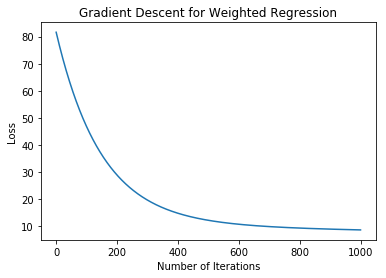

In [110]:
y = np.loadtxt(y_path)
x = np.array([np.ones(len(x_data)), x_data])
weights = np.exp(-1 * x[1, :] * x[1, :] / 20)
wlr = weighted_lin_reg(2)
wlr.gradient_descent(x, y, weights, step_size = 0.00001)


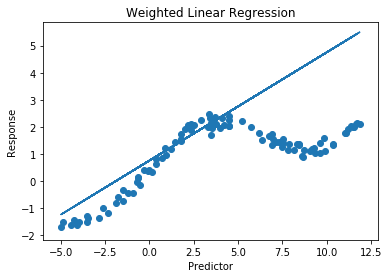

In [111]:
plt.plot(x[1, :], wlr.predict(x))
plt.xlabel("Predictor")
plt.ylabel("Response")
plt.title("Weighted Linear Regression")
plt.scatter(x[1, :], y)
plt.savefig("WLR.png")

In [112]:
wlr.coeff

array([0.75992091, 0.39905379])